In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expressions
import matplotlib.pyplot as plt # matplotlib for plotting
import seaborn as sns # seaborn for better graphics
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Reading The Data
data = pd.read_csv("data-1.csv", index_col = 'Unnamed: 0')

In [9]:
#To CHeck WHether Data Is Correct or Not
print(data)

           ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https

In [10]:
# cleaning Wage and Value columns from currency to normal numbers
data['Wage'] = data['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))
data['Value'] = data['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.', '')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))

In [11]:
# getting top ten most popular countries
top_ten_countries = data['Nationality'].value_counts().head(10).index.values
top_ten_countries_data = data.loc[data['Nationality'].isin(top_ten_countries), :]

# How does the distribution of players overall score differ from country to country?

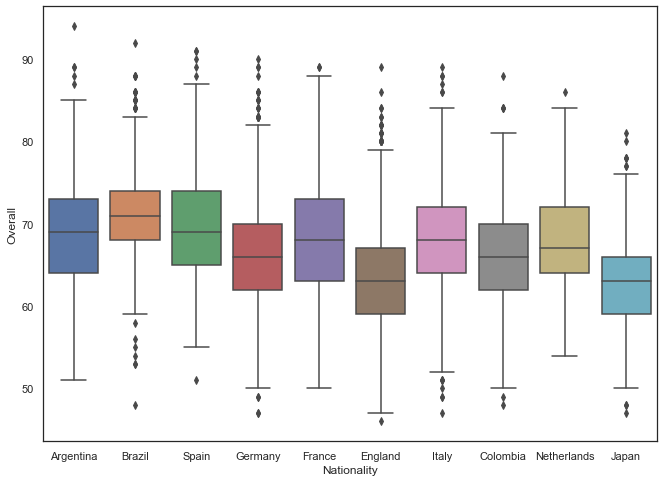

In [12]:
sns.set(style="white")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Overall', data = top_ten_countries_data)

Spain, Brazil and Argentina have the players with highest overall scores, followed closely by France and Italy.

# How does the distribution of players potential score differ from country to country?

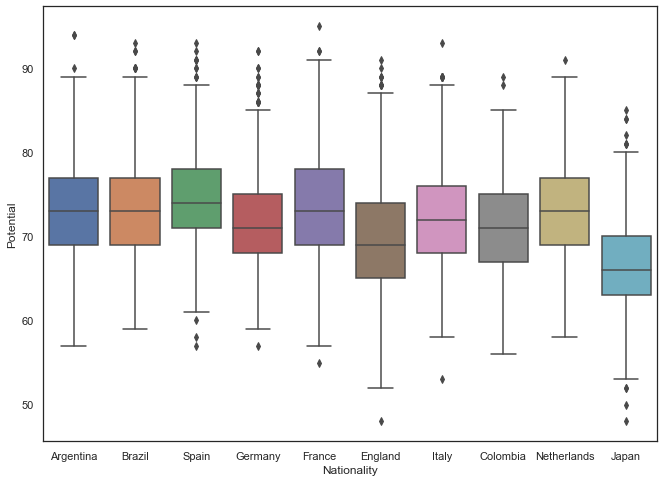

In [13]:
#How does the distribution of players potential score differ from country to country?
sns.set(style="white")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Potential', data = top_ten_countries_data)

Spain have the highest potential followed closely by Brazil, Argentina and France, a bit different from overall scores..

# Wages Across Clubs

In [14]:
# getting top ten clubs
top_ten_clubs = ['FC Barcelona', 'Real Madrid', 'Manchester City', 'Arsenal', 'Liverpool', 'Manchester United', 'Borussia Dortmund', 'FC Bayern München', 'Juventus', 'Paris Saint-Germain']
top_ten_clubs_data = data.loc[data['Club'].isin(top_ten_clubs), :]

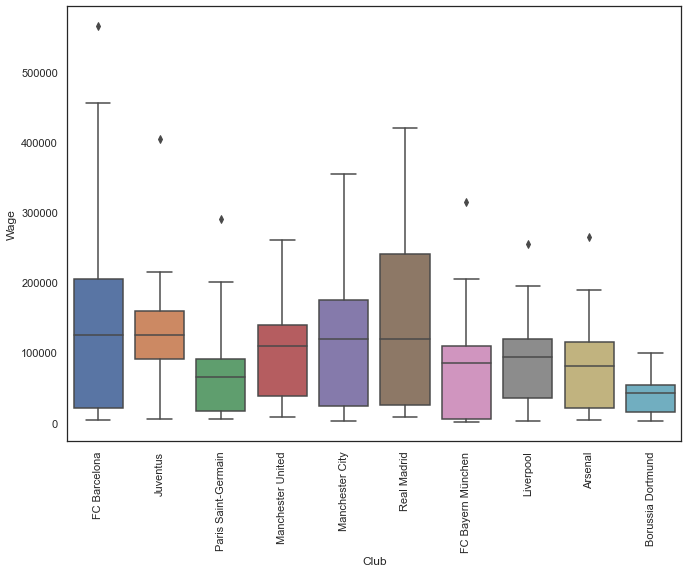

In [15]:
sns.set(style="white")
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Club', y = 'Wage', data = top_ten_clubs_data)
p = plt.xticks(rotation=90)

FC Barcelona and Real Madrid have the highest wage budgets, followed closely by Juventus and Manchester City.

# Market Value Of Players Across Clubs

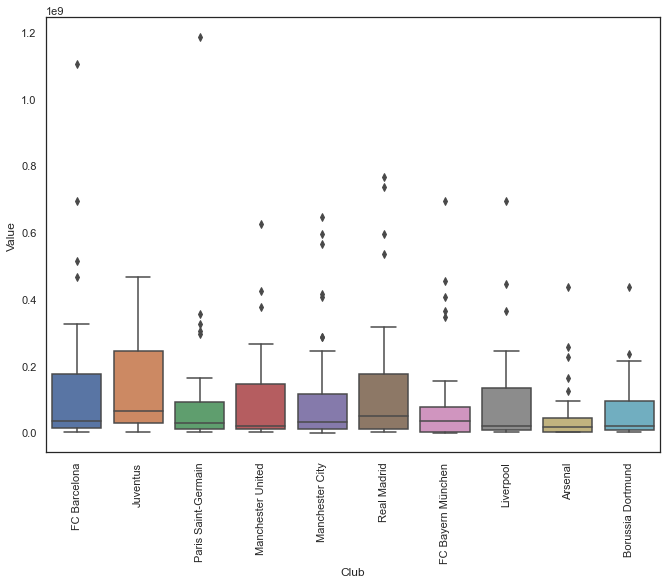

In [16]:
sns.set(style="white")
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Club', y = 'Value', data = top_ten_clubs_data)
p = plt.xticks(rotation=90)

As per the Data, Juventus have the most expensive players followed by Real Madrid, FC Barcelona and Liverpool.

# Overall v/s Potential Comparison

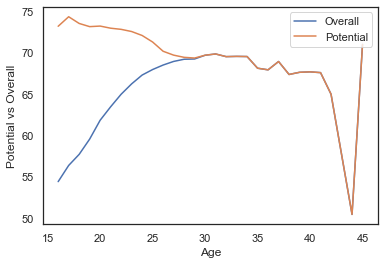

In [17]:
p = sns.lineplot(x = 'Age', y = 'Overall', ci = None, data = data, label = 'Overall')
p = sns.lineplot(x = 'Age', y = 'Potential', ci = None, data = data, label = 'Potential')
p = plt.ylabel('Potential vs Overall')
p = plt.legend(loc = 1)

Players spend their time from age 15 to around 30 meeting their expected potential.

# Whether Player Cost Vary as per their Age?

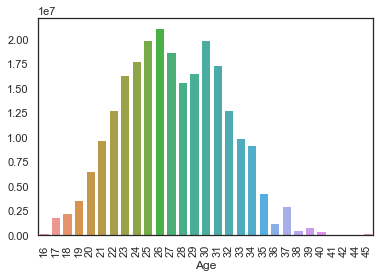

In [18]:
mean_value_per_age = data.groupby('Age')['Value'].mean()
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values)
p = plt.xticks(rotation=90)

Players are most expensive between age 22-30.

# Do Player Wages Depends on their Age?

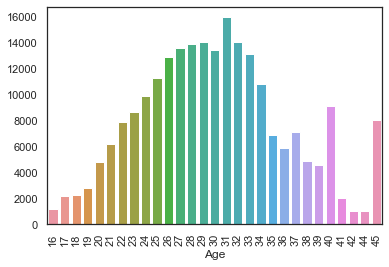

In [19]:
mean_wage_per_age = data.groupby('Age')['Wage'].mean()
p = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values)
p = plt.xticks(rotation=90)

Players wages start growing exponentially after age 20 and reach a peak at age 27-32 after which it reduces steeply again.

# Does Position Impact the Players Value?

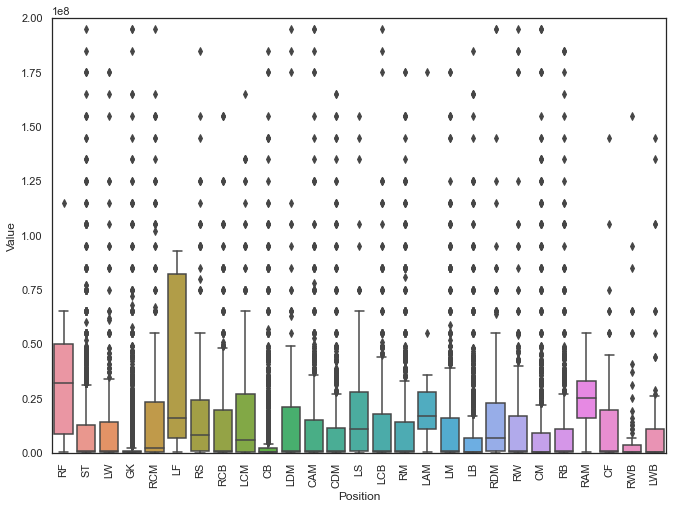

In [20]:
avg_value_by_position = data.groupby('Position')['Value'].mean()
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Position', y = 'Value', data = data)
p = plt.xticks(rotation=90)
p = plt.ylim(0, 200000000)

Players playing at LF and RF have highest market value, followed by midefield positions. The order is forwards > midfielders > defenders > goalkeepers.

# Preferred Foot Analysis

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

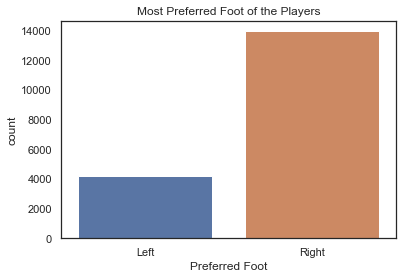

In [21]:
sns.countplot(data['Preferred Foot'])
plt.title('Most Preferred Foot of the Players')

Preferred Foot of the Player is Right 

# Does Age Affect Player Potential?

Text(0.5, 1.0, 'Age vs Potential')

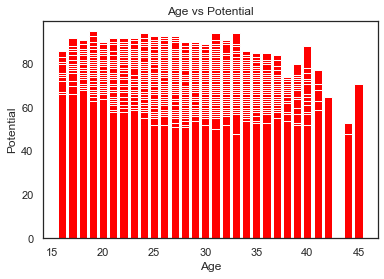

In [22]:
plt.bar(data['Age'],data['Potential'],color='red')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title("Age vs Potential")

Potential Falls With Increase in Age

# Whether Player Potential is affected by their Foot Preference?

Text(0.5, 1.0, 'Relation between Preferred Foot and Potential')

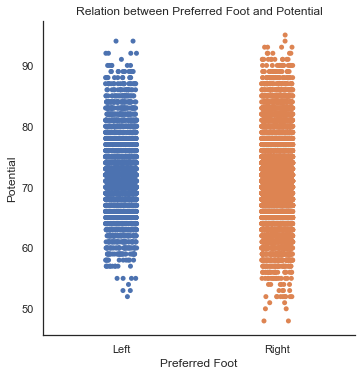

In [23]:
ax = sns.catplot(x="Preferred Foot",y="Potential",data=data)
plt.title("Relation between Preferred Foot and Potential")

Potential Hardly Matters Whether a Player is Lefty or Righty

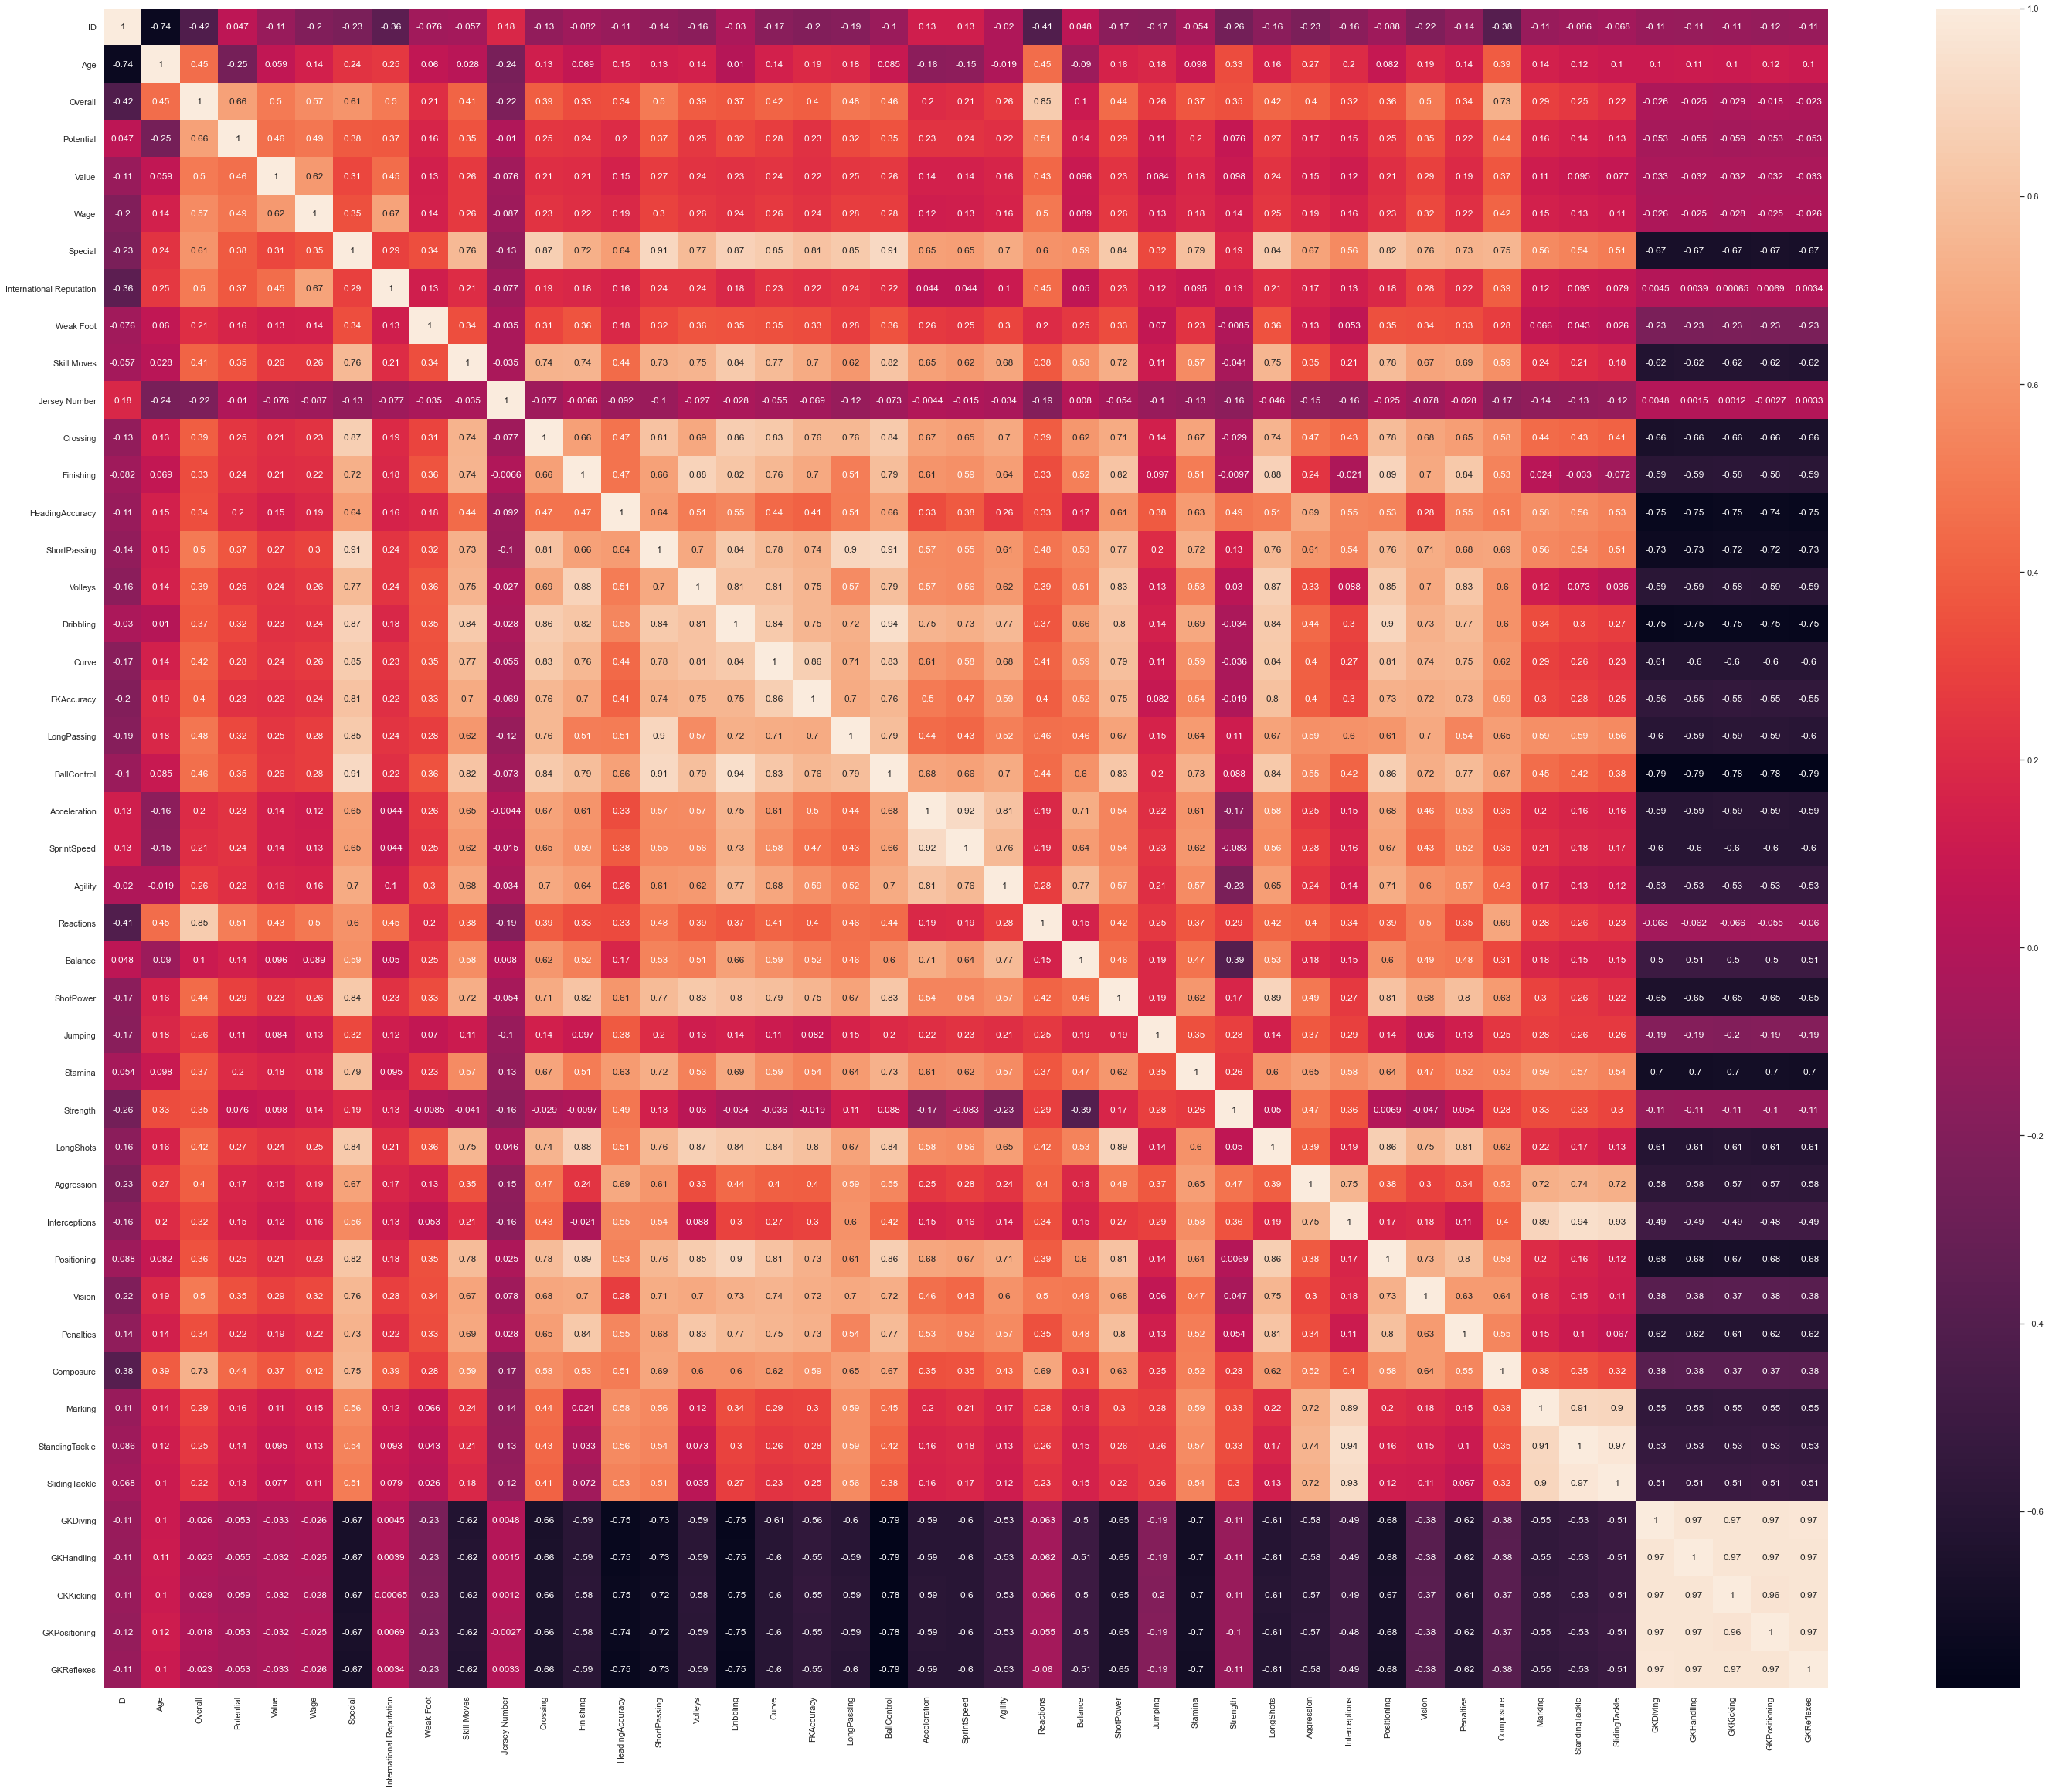

In [24]:
plt.figure(figsize=(50,40))
p = sns.heatmap(data.corr(), annot=True)

In [25]:
#Restricting Data Colums For Further ANalysis
data = data[['Name', 'Age', 'Nationality', 'Value', 'Wage', 'Preferred Foot', 'Height', 'Weight', 'Position', 'Overall']]
print(data.head())

                Name  Age Nationality       Value    Wage Preferred Foot  \
0           L. Messi   31   Argentina  1105000000  565000           Left   
1  Cristiano Ronaldo   33    Portugal    77000000  405000          Right   
2          Neymar Jr   26      Brazil  1185000000  290000          Right   
3             De Gea   27       Spain    72000000  260000          Right   
4       K. De Bruyne   27     Belgium   102000000  355000          Right   

  Height  Weight Position  Overall  
0    5'7  159lbs       RF       94  
1    6'2  183lbs       ST       94  
2    5'9  150lbs       LW       92  
3    6'4  168lbs       GK       91  
4   5'11  154lbs      RCM       91  


# Height Analysis

In [26]:
#Height Analysis
Height_cm = []
for i in list(data['Height'].values):
    try:
        Height_cm.append((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
        
data['Height_cm'] = Height_cm

In [27]:
data.dropna(inplace = True)
print(data['Height_cm'].head())

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height_cm, dtype: float64


In [28]:
print("Mean: ", data['Height_cm'].mean())
print("Standard Deviation: ", data['Height_cm'].std())

Mean:  181.2594500468073
Standard Deviation:  6.730334804085826


Text(0, 0.5, '\n Number Of Players')

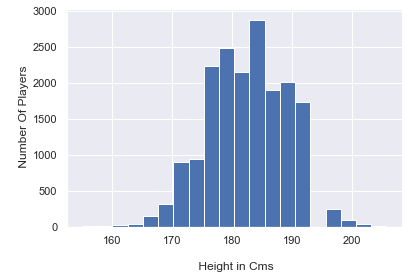

In [29]:
#Height histogram
sns.set()
data['Height_cm'].hist(bins = 20)
plt.xlabel('\n Height in Cms')
plt.ylabel('\n Number Of Players')

# Weight Analysis

In [30]:
data['Weight_kg'] = data['Weight'].str[:3].astype(float)/2.20462
print(data.head(20))

                 Name  Age Nationality       Value    Wage Preferred Foot  \
0            L. Messi   31   Argentina  1105000000  565000           Left   
1   Cristiano Ronaldo   33    Portugal    77000000  405000          Right   
2           Neymar Jr   26      Brazil  1185000000  290000          Right   
3              De Gea   27       Spain    72000000  260000          Right   
4        K. De Bruyne   27     Belgium   102000000  355000          Right   
5           E. Hazard   27     Belgium    93000000  340000          Right   
6           L. Modrić   32     Croatia    67000000  420000          Right   
7           L. Suárez   31     Uruguay    80000000  455000          Right   
8        Sergio Ramos   32       Spain    51000000  380000          Right   
9            J. Oblak   25    Slovenia    68000000   94000          Right   
10     R. Lewandowski   29      Poland    77000000  205000          Right   
11           T. Kroos   28     Germany   765000000  355000          Right   

In [31]:
print("Mean: ", data['Weight_kg'].mean())
print("Standard Deviation: ", data['Weight_kg'].std())

Mean:  75.28869936411941
Standard Deviation:  7.073050073247245


Text(0, 0.5, '\n Number Of Players')

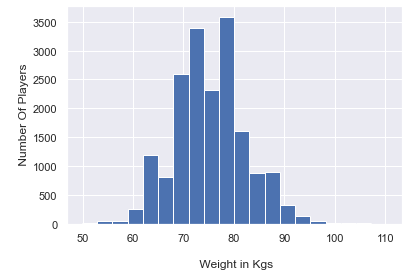

In [32]:
sns.set()
data['Weight_kg'].hist(bins = 20)
plt.xlabel('\n Weight in Kgs')
plt.ylabel('\n Number Of Players')

# Frequency Of Players From Every Nation

In [33]:
from collections import Counter
print(Counter(data['Nationality'].values))

Counter({'England': 1657, 'Germany': 1195, 'Spain': 1071, 'Argentina': 936, 'France': 911, 'Brazil': 825, 'Italy': 699, 'Colombia': 616, 'Japan': 478, 'Netherlands': 452, 'Sweden': 396, 'China PR': 390, 'Chile': 388, 'Republic of Ireland': 368, 'Mexico': 365, 'United States': 353, 'Poland': 348, 'Norway': 341, 'Saudi Arabia': 337, 'Denmark': 335, 'Korea Republic': 333, 'Portugal': 322, 'Turkey': 303, 'Austria': 296, 'Scotland': 283, 'Belgium': 259, 'Australia': 236, 'Switzerland': 220, 'Uruguay': 149, 'Senegal': 130, 'Wales': 129, 'Croatia': 126, 'Serbia': 126, 'Nigeria': 121, 'Ghana': 114, 'Greece': 102, 'Czech Republic': 100, 'Ivory Coast': 100, 'Cameroon': 90, 'Morocco': 85, 'Paraguay': 84, 'Russia': 79, 'Northern Ireland': 79, 'Ukraine': 73, 'South Africa': 71, 'Finland': 67, 'Venezuela': 66, 'Canada': 64, 'Bosnia Herzegovina': 61, 'Algeria': 60, 'Slovenia': 55, 'Slovakia': 54, 'Romania': 54, 'DR Congo': 52, 'Iceland': 47, 'New Zealand': 44, 'Ecuador': 43, 'Mali': 43, 'Albania': 39

In [34]:
#Considering Top 10 Frequency Nation For Further Analysis
print(Counter(data['Nationality'].values).most_common(10))

[('England', 1657), ('Germany', 1195), ('Spain', 1071), ('Argentina', 936), ('France', 911), ('Brazil', 825), ('Italy', 699), ('Colombia', 616), ('Japan', 478), ('Netherlands', 452)]


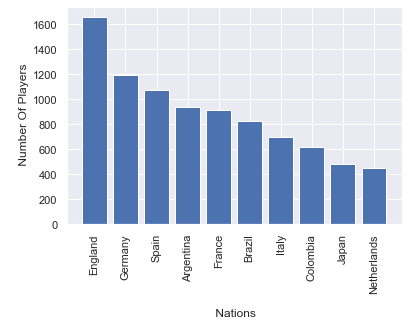

In [35]:
#Bar Graph
bar_plot = dict(Counter(data['Nationality'].values).most_common(10))
plt.bar(*zip(*bar_plot.items()))
plt.xlabel('\n Nations')
plt.ylabel('\n Number Of Players')
plt.xticks(rotation=90)

plt.show()

England is the Most Frequent Nationality with 1657 Records followed by Germany, Spain.

# Most Common Position

In [36]:
def plot_most_common(category):
    bar_plot = dict(Counter(data[category].values).most_common(10))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

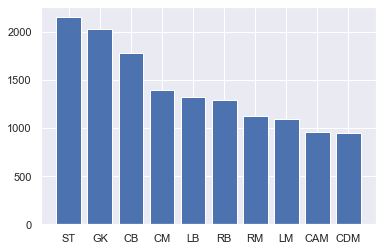

In [37]:
plot_most_common('Position')

ST/Striker is the most common Position Followed By GK/GoalKeeping

In [38]:
#Converting Values in Float
value_list = []
for i in list(data['Value'].values):
    try:
        value_list.append(float(i)*1e6)
    except(ValueError):
        value_list.append(np.nan)
data['Value_numeric'] = value_list

In [39]:
#Converting AGe into Integers
data['Age'] = data['Age'].astype(int)

# Market Value Distribution For Top Ten Countries

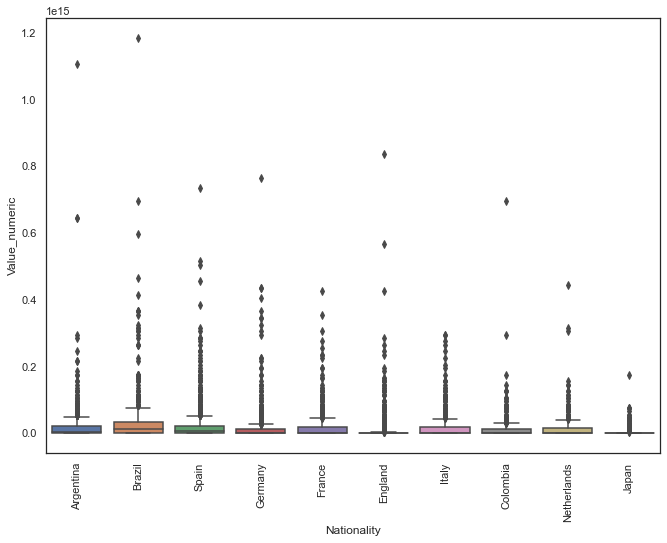

In [40]:
data = data[data['Nationality'].isin(['England', 'Germany', 'Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands'])]
sns.set(style="white")
plt.figure(figsize=(11, 8))
p= sns.boxplot(x= data['Nationality'], y = data['Value_numeric'])
p = plt.xticks(rotation=90)

Brazil have the highest and maximum market value players

# Distribution Of Age v/s Nation

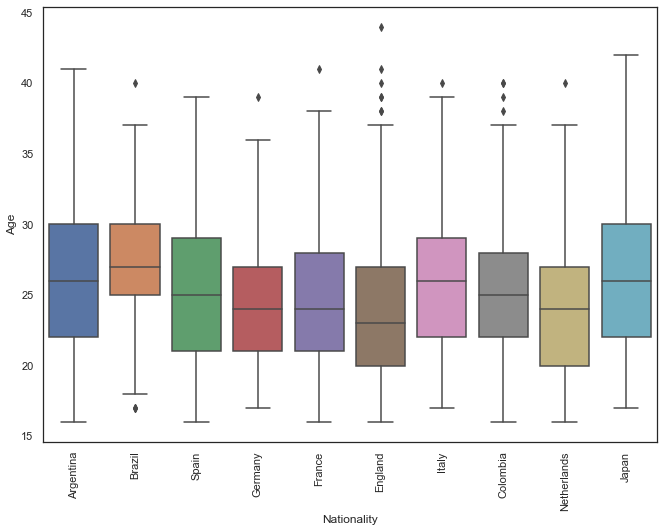

In [41]:
plt.figure(figsize=(11, 8))
sns.set(style="white")
plt.xticks(rotation=90)
sns.boxplot(x= data['Nationality'], y = data['Age'])
plt.show()

Players from Japan And Argentina is more Older compared the other Nations.

# Distribution of Weight v/s Nation

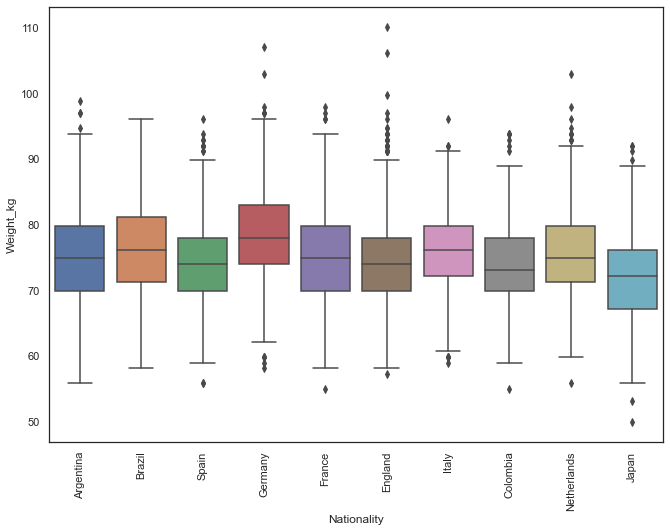

In [42]:
plt.figure(figsize=(11, 8))
sns.set(style="white")
sns.boxplot(x= data['Nationality'], y = data['Weight_kg'])
plt.xticks(rotation=90)

plt.show()

# Distribution of Height V/s Nation

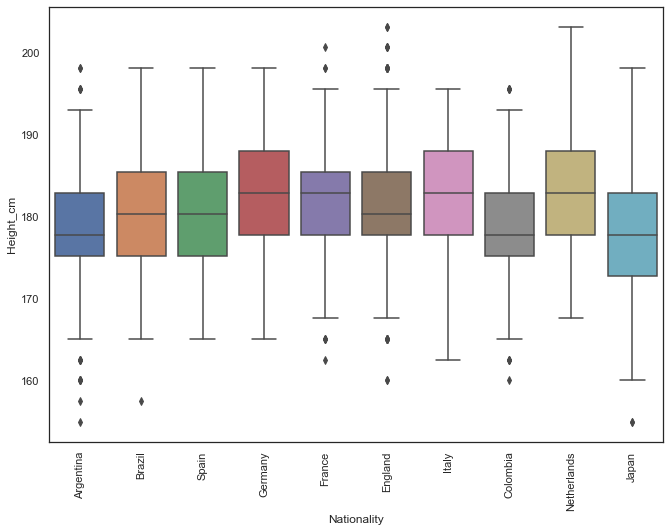

In [43]:
plt.figure(figsize=(11, 8))
sns.set(style="white")
sns.boxplot(x= data['Nationality'], y = data['Height_cm'])
plt.xticks(rotation=90)
plt.show()